<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_7_Logistic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Classifier.

In [110]:
# Paweł Lorek


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import copy as cp

from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
#keras -> tensorflow.keras

from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras.utils import to_categorical
from keras.datasets import mnist



# Binary Classification

### MNIST (again). we will start with binary classification, choose only digits 0 or 1

In [111]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [112]:
x_train2, y_train2 = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]
x_test2, y_test2 = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]


# nr of samples, size  of images
n_samples_train, h, w =     x_train2.shape
n_samples_test, _, _ =      x_test2.shape
print("images of size: h= ", h,", w = ", w)
# reshape nr_samples * "vectorized image"

x_train2 = x_train2.reshape((-1, h*w))
x_test2 = x_test2.reshape((-1, h*w))

print("x_train2.shape = ", x_train2.shape)
print("x_test2.shape = ", x_test2.shape)

#normalize
x_train2 = x_train2 / 255
x_test2 = x_test2 / 255

images of size: h=  28 , w =  28
x_train2.shape =  (12665, 784)
x_test2.shape =  (2115, 784)


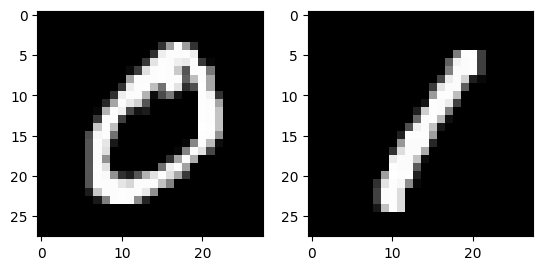

In [113]:
f = plt.figure()
f.add_subplot(1,2, 1)
img=x_train2[0].reshape(h,w)
plt.imshow(img,cmap='gray')
img=x_train2[1].reshape(h,w)
f.add_subplot(1,2, 2)
plt.imshow(img,cmap='gray')
plt.show()

**Method**
Suppose we are to estimate if a person dies next year:
 $$Pr(death | \mathbf{x})$$
 where
 $$\mathbf{x}=(\textrm{age, yearly alcohol usage, cholesterol,...})$$

 We want some simple model:
 $$z=w_0+w_1x_1+\ldots+w_d x_d =\mathbf{x}^T\mathbf{w}\qquad (\mathbf{x}=(1,x_1,\ldots,x_d))$$
 Roughly speaking, the larger the above value,
 the larger the chances of death.

 We want to "transform" $z$ into probability.  One way, take
$$f(z)={1\over 1+e^{-z}}$$

Given data: $(\mathbf{x}_1,...,\mathbf{x}_n)$ ("train images"), $(y_1,\ldots,y_n)$, $y_i\in\{0,1\}$ ("y_train", "labels") we assume that y_i was a result of flipping a coin with succ. probl $f(z)$
$$Y_i\sim Bernoulli(f(z))$$
(**recall**:  we always use $z=w_0+w_1x_1+\ldots+x_dw_d$)

$$
Pr(Y_i=s)
 =\left\{
 \begin{array}{lll}
  f(z) & \textrm{if} & s=1\\
  1-f(z) & \textrm{if} & s=0\\  
 \end{array}\right.  \qquad \qquad = f(z)^s (1-f(z))^{1-s}
$$

And the probability that we observed $(y_1,\ldots,y_n)$ given current $(w_0,\ldots,w_d)$ (**here** $z_i=\mathbf{x}^T_i\mathbf{w}$)

$$L(\mathbf{w})=\prod_{i=1}^n Pr(Y_i=y_i|\mathbf{w}) =\prod_{i=1}^n f(z_i)^{y_i} (1-f(z_i))^{1-y_i}$$

We want to find $\textrm{argmax}_\mathbf{w} L(\mathbf{w})$, we have
$$\textrm{argmax}_\mathbf{w} L(\mathbf{w}) =\textrm{argmin}_\mathbf{w} BCE(\mathbf{w}), $$
  where
$$BCE(\mathbf{w}) = -{1\over n}\log L(\mathbf{w})= -{1\over n}\sum_{i=1}^n \left[y_i \log f(z_i)+(1-y_i)\log(1-f(z_i))\right]$$

This is **BINARY CROSS ENTROPY** LOSS FUNCTION!

# A) Built-in logistic classifier (sklearn, for comparison):

In [114]:
#clf_lc = LogisticRegression(random_state=0, penalty="elasticnet", solver='saga', l1_ratio=0.5, max_iter=200).fit(x_train2,y_train2)
clf_lc = LogisticRegression(random_state=0).fit(x_train2,y_train2)

lc_y_pred=clf_lc.predict(x_test2)
print("Log. clf: accuracy  = \t",accuracy_score(lc_y_pred,y_test2), " correctly cl. cases=",np.sum(lc_y_pred==y_test2))


Log. clf: accuracy  = 	 0.9995271867612293  correctly cl. cases= 2114


# B) Using Keras



### Simplest (?) NN:
create 1 dense layer : in our case, m=h*w =28 * 28 = 784

![alt text](https://raw.githubusercontent.com/lorek/datasets/master/nn_1_denselayer.png)

Now we need to specify the model:

In [115]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(h*w,), activation='sigmoid'))


In [116]:
# set some parameters: use SGD as optimizer, loss='binary_crossentropy'

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# REMARK: metrics=['accuracy'] -- not used in learning at all
# (needed later for evaluation)

In [117]:
#learning:
model.fit(x=x_train2,y=y_train2,  epochs=5,batch_size=128)

Epoch 1/5
99/99 [==============================] - 1s 2ms/step - loss: 0.2692 - accuracy: 0.9442
Epoch 2/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9962
Epoch 3/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9965
Epoch 4/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9965
Epoch 5/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9965


In [118]:
#prediction
nn_y_pred_prob = model.predict(x_test2)
nn_y_pred = (nn_y_pred_prob>0.5).astype(int)
print("NN clf: accuracy  =  \t",accuracy_score(nn_y_pred ,y_test2))

67/67 [==============================] - 0s 1ms/step
NN clf: accuracy  =  	 0.9985815602836879


COMPARISON of Keras vs sklearn:

In [119]:
print("Log. clf (sklearn): accuracy  = \t",accuracy_score(lc_y_pred,y_test2), " correctly cl. cases=",np.sum(lc_y_pred==y_test2))
print("NN clf (Keras): accuracy  =  \t\t",accuracy_score(nn_y_pred ,y_test2), " correctly cl. cases=",np.sum(nn_y_pred.reshape(-1)==y_test2))

Log. clf (sklearn): accuracy  = 	 0.9995271867612293  correctly cl. cases= 2114
NN clf (Keras): accuracy  =  		 0.9985815602836879  correctly cl. cases= 2112


VISUALIZATION of results

Have a closer look at coefficients $w_0, \ldots, w_d$

Sum(|lc_coef|) LC:  86.50905887026815
Sum(|nn_coef|) LC:  40.85721


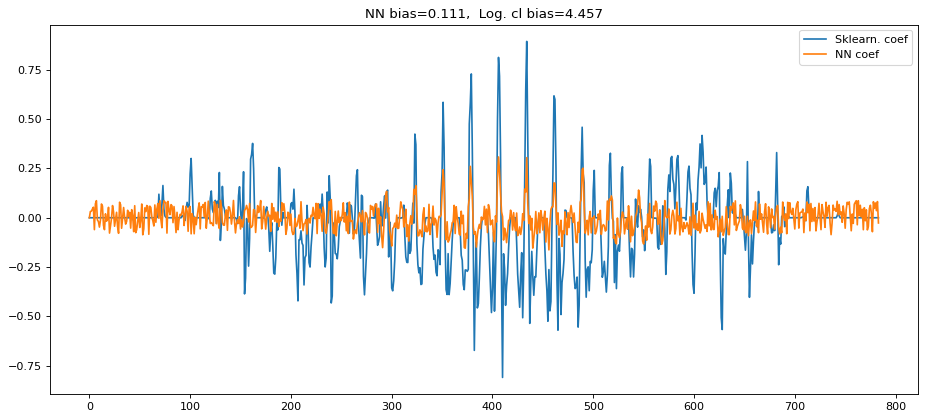

In [120]:
# coef. and bias of logist. cl:
nn_coef=model.weights[0].numpy().reshape(-1)
lc_coef = clf_lc.coef_.reshape(-1)
lc_bias = clf_lc.intercept_[0]

# coef and bias of nn
nn_coef = model.layers[0].get_weights()[0].reshape(-1)
nn_bias = model.layers[0].get_weights()[1][0]

#draw coefs
plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(h*w), lc_coef, label="Sklearn. coef")
plt.plot(np.arange(h*w), nn_coef, label="NN coef")
plt.title("NN bias="+str(np.round(nn_bias,3)) + ",  Log. cl bias="+str(np.round(lc_bias,3)));

print("Sum(|lc_coef|) LC: ", np.sum(np.abs(lc_coef)))
print("Sum(|nn_coef|) LC: ", np.sum(np.abs(nn_coef)))

plt.legend()
plt.show()


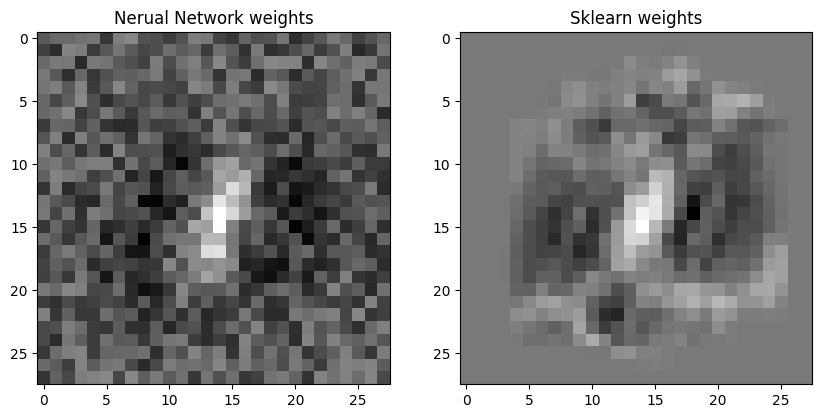

In [121]:
f = plt.figure(figsize=(10, 10))
f.add_subplot(1,2, 1)
plt.imshow(nn_coef.reshape(h,w), cmap='gray' )
plt.title("Nerual Network weights")
f.add_subplot(1,2, 2)
plt.imshow(lc_coef.reshape(h,w), cmap='gray')
plt.title("Sklearn weights")
plt.show()

Visulalize predicted probabilities (true classes given by color)

In [122]:
nn_y_pred_proba = model.predict(x_test2) # <- these are actually probabilities
print(nn_y_pred_proba)

67/67 [==============================] - 0s 1ms/step
[[0.97095376]
 [0.00371033]
 [0.98740053]
 ...
 [0.9882949 ]
 [0.01662008]
 [0.9942965 ]]


(100,)


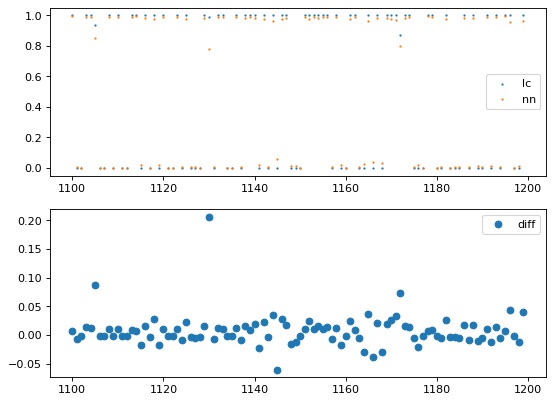

In [123]:
fr=1100; to=1200
xx=np.arange(fr,to)
print(xx.shape)
f = plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
f.add_subplot(2,1, 1)
plt.scatter(xx,lc_y_pred_proba[fr:to], s=1,label='lc');
plt.scatter(xx,nn_y_pred_proba[fr:to], s=1,label='nn');
#

plt.legend()

f.add_subplot(2,1, 2)
plt.scatter(xx,lc_y_pred_proba[fr:to]-nn_y_pred_proba[fr:to].reshape(-1), label='diff');
plt.legend()
plt.show()

# Q7.1
* Extend built logistic regression model: Add one extra (first) layer with 512 neurons (dense layer). Consider 2-3 different activation functions, try different optimizers (and learning rates). Compare accuracy on test set with previous models. How many parameters does your network have?

# C) Own implementation (of stochastic gradient descent for logistic classifier).

Recall, on a lecture we have shown that the gradient of binary cross entropy can be expressed as:
$$\nabla_{\mathbf{w}}g(\mathbf{w})=\mathbf{X}^T(\boldsymbol{\rho}-\mathbf{y})$$
where $\boldsymbol{\rho}=(\rho(1),\ldots,\rho(n))^T$ and
$$\rho(i) = \textrm{sigmoid}(\mathbf{w}^T \mathbf{x}_i)={\exp\left(\sum_{j=1}^d w_{j} x_{ij}\right)\over 1+\exp\left(\sum_{j=1}^d w_{j} x_{ij}\right)}$$


We want $\mathbf{w}=(w_0,w_1,w_2,\ldots,w_d)$, $w_0$ is the bias. Trick: we will "enlarge" dimension of observations, adding first column with all ones.

In [124]:
# add extra FIRST column to xs (for bias)
x_train2_with_ones = np.ones((x_train2.shape[0],x_train2.shape[1]+1))
x_train2_with_ones[:,1:x_train2_with_ones.shape[1]]=x_train2

x_test2_with_ones = np.ones((x_test2.shape[0],x_test2.shape[1]+1))
x_test2_with_ones[:,1:x_test2_with_ones.shape[1]]=x_test2
print(x_test2_with_ones[:,0])



[1. 1. 1. ... 1. 1. 1.]


In [125]:
x_train2.shape,x_train2_with_ones.shape

((12665, 784), (12665, 785))

Initial random weights:


In [126]:
np.random.seed(11)
weights_init = np.random.rand(x_train2_with_ones.shape[1])*2-1

In [127]:
# sigmoid
def sigmoid(X, weight):
    z = np.dot(X, weight)
    f=1 / (1 + np.exp(-z))
    return f


# compute accuracy given X_test, Y_test and Weights

def get_accuracy_score(X_test, Y_test, Weights):
  Y_pred_proba=sigmoid(X_test,Weights)
  Y_pred=np.zeros(X_test.shape[0])
  Y_pred[Y_pred_proba>0.5]=1
  return accuracy_score(Y_pred,Y_test)

In [128]:

print("acc with init weights  " , get_accuracy_score(x_test2_with_ones, y_test2, weights_init));#

acc with init weights   0.4765957446808511


In [129]:
# Simple direct implementation

def gd_learning1(X_train, Y_train, weights_initial, epochs, l_rate=0.1):
  weightss = cp.copy(weights_init)
  # print(weightss)
  for epoch in range(epochs):
    f=sigmoid(X_train, weightss)
    gradient =  np.dot(X_train.T, (f - Y_train)) / Y_train.shape[0] # <-- MAIN STEP (gradient)
    weightss = weightss - l_rate * gradient
  #print(weightss)
  return weightss

In [130]:
# Run gd_learning1
# (try more epochs=steps)
weights_gd1 = gd_learning1(x_train2_with_ones,y_train2, weights_init, 200,0.1);
gd1_200_accuracy=get_accuracy_score(x_test2_with_ones, y_test2, weights_gd1)
print("acc AFTER GD1, : " , gd1_200_accuracy);

acc AFTER GD1, :  0.9929078014184397


# Q7.2
* a) Function `gd_learning1` computes gradient using all data points in each epoch. Implement Function `gd_learning2` which also takes parameter `batch_size` (128 by default) and in one epoch it iterates over batches of size `batch_size` and compute gradient for each batch (one epoch = iteration over all data points, except maybe those not fitted into batch)
* b) Function `gd_learning1` exploits the knowledge of a formula for gradient. Provide implementation using torch automatic differentation (see Lists 5 and 6) where only form of loss is given.

# Multinomial logistic classifier

We will classify digits 0,1,2

In [131]:
x_trainM, y_trainM = x_train , y_train
x_testM, y_testM = x_test , y_test

#x_trainM, y_trainM = x_train[(y_train==0) | (y_train==1) | (y_train==2)], y_train[(y_train==0) | (y_train==1)| (y_train==2)]
#x_testM, y_testM = x_test[(y_test==0) | (y_test==1)| (y_test==2)], y_test[(y_test==0) | (y_test==1)| (y_test==2)]

x_trainM, y_trainM = x_train[y_train<=3], y_train[y_train<=3]
x_testM, y_testM = x_test[y_test<=3], y_test[y_test<=3]


# nr of samples, size  of images
n_samples_trainM, h, w =     x_trainM.shape
n_samples_testM, _, _ =      x_testM.shape
print("images of size: h= ", h,", w = ", w)
# reshape nr_samples * "vectorized image"

x_trainM = x_trainM.reshape((-1, h*w))
x_testM = x_testM.reshape((-1, h*w))

print("x_train2.shape = ", x_trainM.shape)

#normalize
x_trainM = x_trainM / 255
x_testM = x_testM / 255

images of size: h=  28 , w =  28
x_train2.shape =  (24754, 784)


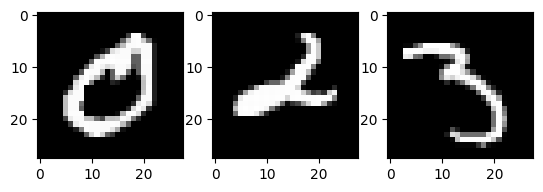

In [132]:
f = plt.figure()
f.add_subplot(1,3, 1)
img=x_trainM[10].reshape(h,w)
plt.imshow(img,cmap='gray')
img=x_trainM[331].reshape(h,w)
f.add_subplot(1,3, 2)
plt.imshow(img,cmap='gray')
img=x_trainM[39].reshape(h,w)
f.add_subplot(1,3,3)
plt.imshow(img,cmap='gray')
plt.show()

**This time -- let us have a look how is Logist. Class. applied in case of >2 classes.**

## Solution 1: one-versus-rest (image: Andrew Ng)
<div>
<img src="https://raw.githubusercontent.com/lorek/datasets/master/LogClass_oneVsRest.png" width="700"/>
</div>

## Solution 2: "Multinomial"  

Recall, in binary case we had:
$$P(Y=1 | \mathbf{x}) = f(\mathbf{w}^T\mathbf{x})=f(z)={1\over 1+e^{-z}}={e^z\over 1+e^{z}} \propto e^z$$


And assume that the model is
$$P(Y=k|\mathbf{x})\propto e^{\mathbf{w}_k\mathbf{x}}$$

Normalizing we have
$$P(Y=k|\mathbf{x})= {e^{\mathbf{w}_k\mathbf{x}}\over \sum_{j=1}^C e^{\mathbf{w}_j\mathbf{x}}}$$


**SOFTMAX:** transforming $(z_1,..., Z_C), z_i\in\mathbb{R}$ into probabilites:
$$\textrm{softmax}(z_i)={e^{z_i}\over \sum_{j=1}^C e^{z_j}}$$
And assume that the model is
$$P(Y=k|\mathbf{x})\propto e^{\mathbf{w}_k\mathbf{x}}$$

 How to compute Likelihood then?
$$L(\mathbf{W})=\prod_{i=1}^n P(Y=y_i|\mathbf{x}_i)=\prod_{i=1}^n\prod_{k=1}^C \left( {e^{\mathbf{w}_k^T\mathbf{x}_i}\over \sum_{i=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}}\right)^{\mathbf{1}(y_i=k)}$$

take log
$$\log L(\mathbf{W}) = \sum_{i=1}^n\sum_{k=1}^C \mathbf{1}(y_i=k)\log\left( {e^{\mathbf{w}_k^T\mathbf{x}_i}\over \sum_{i=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}}\right)$$

and we aim to find $\textrm{argmax}_\mathbf{W} \log(\mathbf{W})$ what is equiv. to finding $\textrm{argmin}_\mathbf{W} CCE(\mathbf{W})$, where
$$\textrm{CCE}(\mathbf{W})  = -\log L(\mathbf{W})$$

 **CCE = Categorical Cross Entropy**



# Binary vs Multiclass:
![alt text](https://raw.githubusercontent.com/lorek/datasets/master/nn_1_denselayerSoftmax.png)

# M1 built in (sklearn)

In [133]:
start_time = time.time()
clf_lcM = LogisticRegression(random_state=0, max_iter=200,   multi_class='multinomial').fit(x_trainM,y_trainM)

print("\t\t took %s seconds " % round((time.time() - start_time),5))

		 took 22.38335 seconds 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**One-vs-rest**

In [134]:
start_time = time.time()
clf_lc_ovr_M = LogisticRegression(random_state=0, max_iter=200,   multi_class='ovr').fit(x_trainM,y_trainM)

print("\t\t took %s seconds " % round((time.time() - start_time),5))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


		 took 27.34401 seconds 


In [135]:
lc_y_predM=clf_lcM.predict(x_testM)
lc_ovr_y_predM=clf_lc_ovr_M.predict(x_testM)
print("Log. MN clf: accuracy  = \t",accuracy_score(lc_ovr_y_predM,y_testM), " correctly cl. cases=",np.sum(lc_ovr_y_predM==y_testM))
print("Log. ovr clf: accuracy  = \t",accuracy_score(lc_ovr_y_predM,y_testM), " correctly cl. cases=",np.sum(lc_ovr_y_predM==y_testM))


Log. MN clf: accuracy  = 	 0.9754630743324513  correctly cl. cases= 4055
Log. ovr clf: accuracy  = 	 0.9754630743324513  correctly cl. cases= 4055


# M2 Keras implementation

In [136]:
model = models.Sequential()
model = models.Sequential(layers.Dense(4, input_shape=(h*w,), activation='softmax'))


In [137]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
print("Shape of y_trainM = ", y_trainM.shape)

# we need to use one hot encoding:

y_train_one_hot_encM = to_categorical(y_trainM)
print("y_train_one_hot_enc[0,:] = ",y_train_one_hot_encM[0,:])

y_test_one_hot_encM = to_categorical(y_testM)

Shape of y_trainM =  (24754,)
y_train_one_hot_enc[0,:] =  [1. 0. 0. 0.]


In [139]:
#learning:
start_time = time.time()
model.fit(x=x_trainM,y=y_train_one_hot_encM, shuffle=True, epochs=5,batch_size=16)
print("\t\t took %s seconds " % round((time.time() - start_time),5))

Epoch 1/5
1548/1548 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.9409
Epoch 2/5
1548/1548 [==============================] - 3s 2ms/step - loss: 0.1376 - accuracy: 0.9615
Epoch 3/5
1548/1548 [==============================] - 2s 2ms/step - loss: 0.1220 - accuracy: 0.9647
Epoch 4/5
1548/1548 [==============================] - 2s 2ms/step - loss: 0.1139 - accuracy: 0.9669
Epoch 5/5
1548/1548 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9676
		 took 21.36349 seconds 


In [140]:
nn_y_predM_prob = model.predict(x_testM)
nn_y_predM = (nn_y_predM_prob>0.5).astype(int)


130/130 [==============================] - 0s 1ms/step


In [141]:
print(accuracy_score(nn_y_predM ,y_test_one_hot_encM))

0.9716141448159731


# Q7.3
* a) Construct a similar model with one extra (first) layer consisting of 512 neurons. Compare resulting accuracy.   Consider 2-3 different activation functions, try different optimizers (and learning rates). Compare accuracy on test set with previous models. How many parameters does your network have?
* b) Built similar models (multinomial logistic regression and extended with 512 neurons) for classifying all ten digits. Compare running times.
